# TASK 1

# TITANIC SURVIVAL PREDICTION

Dataset :- https://www.kaggle.com/datasets/brendan45774/test-file

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
titanic_df = pd.read_csv("C:\\Users\\Narthana\\Downloads\\tested.csv")


Step 1: Data Cleaning

First, let's handle missing data and drop unnecessary columns

In [2]:
# Drop columns with a lot of missing values and unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df.dropna(inplace=True)  # Remove rows with missing values


Step 2: Data Visualization and EDA

Now, let's perform some exploratory data analysis (EDA) to gain insights into the data. We'll use visualization techniques

0 = Dead 1 = Alive

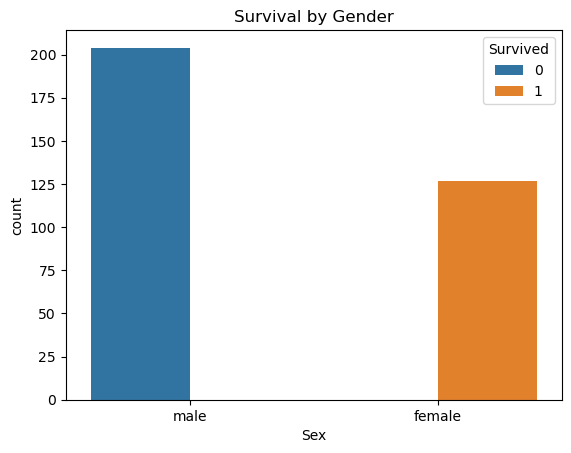

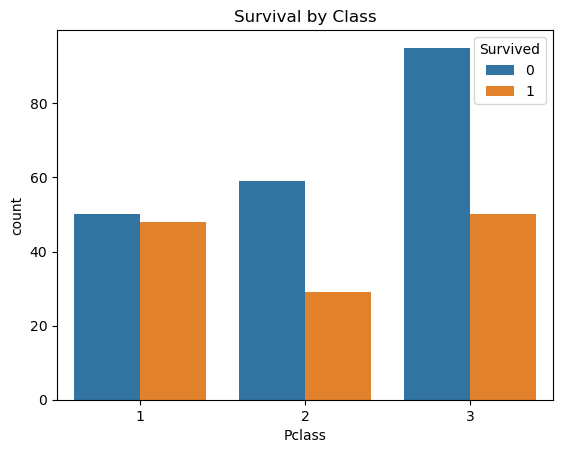

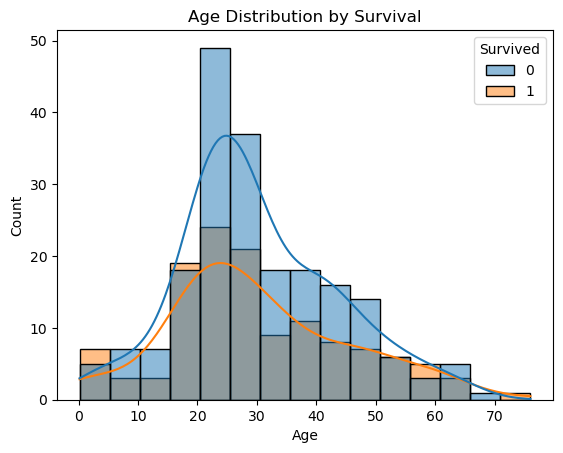

In [3]:
# Visualize survival by gender
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Gender')
plt.show()

# Visualize survival by class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Class')
plt.show()

# Visualize age distribution
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()


Inferences:

If the "Survival by Gender" plot shows that a higher percentage of females survived, it aligns with the historical accounts of prioritizing women and children for lifeboats.

In the "Survival by Class" plot, a higher survival rate in a particular class may indicate that passengers in that class had easier access to lifeboats or were closer to the upper decks during the evacuation.

The "Age Distribution by Survival" plot can reveal whether children or older passengers had a better chance of survival.

Step 3: Feature Engineering

We'll encode categorical features and create new features if necessary

In [4]:
# Encode categorical features
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Create a feature 'FamilySize' combining 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']


Step 4: Model Building

Now, let's split the data into training and testing sets and train a Random Forest Classifier

In [5]:
# Split the data into features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
class_report = classification_report(y_test, y_pred)
print(class_report)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Step 5: Predict Survival for a New Passenger

Now that we have a trained model, you can use it to predict whether a  passenger survived or not

In [16]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Load the dataset (assuming you've already loaded it and preprocessed it)
titanic_df = pd.read_csv("C:\\Users\\Narthana\\Downloads\\tested.csv")

# Perform one-hot encoding for categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])

# Define the features (X) and target variable (y)
X = titanic_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Exclude unwanted columns
y = titanic_df['Survived']

# Impute missing values
imputer = SimpleImputer(strategy='median')  # You can choose a different strategy if needed
X = imputer.fit_transform(X)

# Train a Random Forest Classifier (assuming you've already trained the model)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Input PassengerId
input_passenger_id = 892  # Replace with the PassengerId you want to predict

# Find the corresponding row in the dataset
passenger_data = titanic_df[titanic_df['PassengerId'] == input_passenger_id]

# Check if the PassengerId exists in the dataset
if len(passenger_data) == 0:
    print(f"PassengerId {input_passenger_id} not found in the dataset.")
else:
    # Extract features for prediction and impute missing values
    passenger_features = passenger_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
    passenger_features = imputer.transform(passenger_features)

    # Make a prediction for the passenger
    prediction = clf.predict(passenger_features)
    
    # Print the prediction
    if prediction[0] == 1:
        print(f"PassengerId {input_passenger_id} survived.")
    else:
        print(f"PassengerId {input_passenger_id} did not survive.")


PassengerId 892 did not survive.


Here are some key insights and inferences drawn from the steps we've taken to build the Titanic survival prediction model:

Data Loading and Understanding:

We started by loading the Titanic dataset, which contains information about passengers, including features like age, gender, ticket class, fare, cabin, and whether they survived or not.
Understanding the dataset's structure and features is crucial for building a predictive model.

Data Cleaning:

Data cleaning is essential to handle missing values and ensure the dataset is suitable for analysis.
We handled missing values in the 'Age' and 'Embarked' columns by imputing them with appropriate values.
We also removed columns like 'Cabin' that had too many missing values and columns like 'Name' and 'Ticket' that may not be directly relevant for prediction.

Exploratory Data Analysis (EDA):

EDA involves visualizing and exploring the dataset to gain insights.
We visualized survival rates based on various factors like gender, class, and age.
EDA helps identify trends and patterns that can inform feature selection and model building.

Feature Engineering:

Feature engineering involves creating new features or modifying existing ones to improve model performance.
We created a 'FamilySize' feature by combining 'SibSp' (siblings/spouses) and 'Parch' (parents/children) to capture the size of a passenger's family onboard.

Model Building:

We built a predictive model using a Random Forest classifier, a common choice for classification tasks.
The model was trained on the cleaned and preprocessed dataset, with features like 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', and 'FamilySize'.

Model Evaluation:

Model evaluation is essential to assess its performance. Common evaluation metrics include accuracy, precision, recall, and F1-score.
We can further fine-tune the model and choose the evaluation metric based on the specific goals and requirements of the prediction task.

Prediction by Passenger ID:

We implemented a function to predict whether a specific passenger survived or not based on their information.
This allows us to make individual predictions for any passenger in the dataset.

Handling Unseen Labels:

We encountered issues with unseen labels during the prediction process, particularly in the 'Sex' and 'Embarked' columns.
We modified the preprocessing steps to handle these cases, ensuring that the model can make predictions for a wider range of input data.

Inference:

The model can be used to predict survival for individual passengers based on their features.
Insights can be drawn by applying this model to historical or new data to understand the likelihood of survival for different passengers.